## 1.데이터 생성

In [2]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import pickle

In [3]:
X1, y1 = make_classification(n_samples=int(20000/ 0.7 / 0.9), n_features=16, n_informative=16, n_redundant=0,  n_classes=2, weights=[0.9,0.1], random_state=0)
X2, y2 = make_classification(n_samples=int(80000/ 0.7 / 0.9), n_features=16, n_informative=16, n_redundant=0,  n_classes=2, weights=[0.9,0.1], random_state=0)

print(f'X1 shape = {X1.shape}')
print(f'X2 shape = {X2.shape}')

X1 shape = (31746, 16)
X2 shape = (126984, 16)


In [4]:
import copy

def contamination(X, y, ratio, weight, is_train):
    tmp_df = pd.DataFrame(X)
    tmp_df['label'] = y
    normal = tmp_df.loc[tmp_df['label'] == 0, :].reset_index(drop=True)
    abnormal = tmp_df.loc[tmp_df['label'] == 1, :].reset_index(drop=True)
    
    normal_idx = np.arange(len(normal))
    abnormal_idx = np.arange(len(abnormal))
    num_contamination = int(ratio * len(abnormal))
    
    np.random.seed(0)
    normal_idx = np.random.choice(normal_idx, size=num_contamination, replace=False)
    abnormal_idx = np.random.choice(abnormal_idx, size=num_contamination, replace=False)
    
    if is_train:
        normal.iloc[normal_idx, :-1] = copy.deepcopy(normal.iloc[normal_idx, :-1].values * (1 - weight))  + copy.deepcopy(abnormal.iloc[abnormal_idx, :-1].values * weight)
        noise_idx = normal_idx
    else:
        abnormal.iloc[abnormal_idx, :-1] = copy.deepcopy(normal.iloc[normal_idx, :-1].values * weight)  + copy.deepcopy(abnormal.iloc[abnormal_idx, :-1].values * (1 - weight))
        noise_idx = abnormal_idx
        
    result_df = pd.concat([normal, abnormal]).reset_index(drop=True)
    
    return num_contamination, result_df, noise_idx

In [3]:
# # # save
# # with open('data.pickle', 'wb') as f:
# #     pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

# # # load
# # with open('data.pickle', 'rb') as f:
# #     data = pickle.load(f)

## 1. train에 noise가 있는 경우
- noise_weight = [0.1, 0.5, 0.9]
- noise_ratio = [0.01, 0.1]
- col=16, row=[2만, 8만]

In [5]:
normal_df1 = pd.DataFrame(X1)
normal_df1['label'] = y1
normal_df1.to_csv('./sim_data/smallNormal.csv', index=False)

for ratio in [0.07, 0.7]:
    for weight in [0.1, 0.5, 0.9]:

        num_dirty_1, dirty_df_1, choice_idx_1 = contamination(X1, y1, ratio, weight, True) # noise는 train, valid 모두에 들어가있다.
        train_noise = num_dirty_1  / (X1.shape[0] * 0.9 * 0.7)

        print(f'noise weight : {weight}, train noise ratio = {train_noise:.3f}')
        
        if ratio == 0.07:
            _ratio = '001'
        else:
            _ratio = '010'
            
        if weight == 0.1:
            _weight = '01'
        elif weight == 0.5:
            _weight = '05'
        else:
            _weight = '09'
            
        dirty_df_1.to_csv('./sim_data/smallTrainNoise_' + _ratio + '_' + _weight + '.csv', index=False)
        
        with open('./sim_data/smallTrainNoise_' + _ratio + '_' + _weight + '.pickle', 'wb') as f:
            pickle.dump(choice_idx_1, f, pickle.HIGHEST_PROTOCOL)

noise weight : 0.1, train noise ratio = 0.012
noise weight : 0.5, train noise ratio = 0.012
noise weight : 0.9, train noise ratio = 0.012
noise weight : 0.1, train noise ratio = 0.115
noise weight : 0.5, train noise ratio = 0.115
noise weight : 0.9, train noise ratio = 0.115


In [6]:
normal_df2 = pd.DataFrame(X2)
normal_df2['label'] = y2
normal_df2.to_csv('./sim_data/bigNormal.csv', index=False)

for ratio in [0.07, 0.7]:
    for weight in [0.1, 0.5, 0.9]:

        num_dirty_2, dirty_df_2, choice_idx_2 = contamination(X2, y2, ratio, weight, True) # noise는 train, valid 모두에 들어가있다.
        train_noise = num_dirty_2  / (X2.shape[0] * 0.9 * 0.7)

        print(f'noise weight : {weight}, train noise ratio = {train_noise:.3f}')
        
        if ratio == 0.07:
            _ratio = '001'
        else:
            _ratio = '010'
            
        if weight == 0.1:
            _weight = '01'
        elif weight == 0.5:
            _weight = '05'
        else:
            _weight = '09'
            
        dirty_df_2.to_csv('./sim_data/bigTrainNoise_' + _ratio + '_' + _weight + '.csv', index=False)
        
        with open('./sim_data/bigTrainNoise_' + _ratio + '_' + _weight + '.pickle', 'wb') as f:
            pickle.dump(choice_idx_2, f, pickle.HIGHEST_PROTOCOL)

noise weight : 0.1, train noise ratio = 0.012
noise weight : 0.5, train noise ratio = 0.012
noise weight : 0.9, train noise ratio = 0.012
noise weight : 0.1, train noise ratio = 0.115
noise weight : 0.5, train noise ratio = 0.115
noise weight : 0.9, train noise ratio = 0.115


## 2. test에 noise가 있는 경우
- test abnormal이 normal과 가까운 경우를 의미
- noise_weight = [0.1, 0.5, 0.9]
- noise_ratio = [0.1]
- col=16, row=[2만, 8만]

In [8]:
for ratio in [0.1]:
    for weight in [0.1, 0.5, 0.9]:

        num_dirty_1, dirty_df_1, choice_idx_1 = contamination(X1, y1, ratio, weight, False) # noise는 train, valid 모두에 들어가있다.
        test_noise = num_dirty_1  / (X1.shape[0] * 0.1)

        print(f'noise weight : {weight}, test noise ratio = {test_noise:.3f}')
        
        if ratio == 0.07:
            _ratio = '001'
        else:
            _ratio = '010'
            
        if weight == 0.1:
            _weight = '01'
        elif weight == 0.5:
            _weight = '05'
        else:
            _weight = '09'
            
        dirty_df_1.to_csv('./sim_data/smallTestNoise_' + _ratio + '_' + _weight + '.csv', index=False)
        
        with open('./sim_data/smallTestNoise_' + _ratio + '_' + _weight + '.pickle', 'wb') as f:
            pickle.dump(choice_idx_1, f, pickle.HIGHEST_PROTOCOL)

noise weight : 0.1, test noise ratio = 0.104
noise weight : 0.5, test noise ratio = 0.104
noise weight : 0.9, test noise ratio = 0.104


In [9]:
for ratio in [0.1]:
    for weight in [0.1, 0.5, 0.9]:
        
        num_dirty_2, dirty_df_2, choice_idx_2 = contamination(X2, y2, ratio, weight, False) # noise는 train, valid 모두에 들어가있다.
        test_noise = num_dirty_2  / (X2.shape[0] * 0.1)

        print(f'noise weight : {weight}, test noise ratio = {test_noise:.3f}')
        
        if ratio == 0.07:
            _ratio = '001'
        else:
            _ratio = '010'
            
        if weight == 0.1:
            _weight = '01'
        elif weight == 0.5:
            _weight = '05'
        else:
            _weight = '09'
            
        dirty_df_2.to_csv('./sim_data/bigTestNoise_' + _ratio + '_' + _weight + '.csv', index=False)
        
        with open('./sim_data/bigTestNoise_' + _ratio + '_' + _weight + '.pickle', 'wb') as f:
            pickle.dump(choice_idx_2, f, pickle.HIGHEST_PROTOCOL)

noise weight : 0.1, test noise ratio = 0.104
noise weight : 0.5, test noise ratio = 0.104
noise weight : 0.9, test noise ratio = 0.104


# Data generation validation

In [11]:
smallNormal = pd.read_csv('./sim_data/smallNormal.csv')
smallTrainNoise_010_09 = pd.read_csv('./sim_data/smallTrainNoise_010_09.csv')
smallTestNoise_010_09 = pd.read_csv('./sim_data/smallTestNoise_010_09.csv')

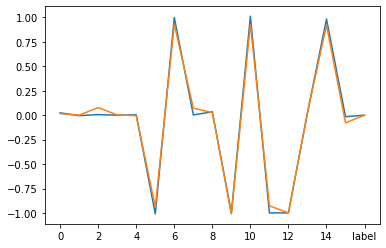

In [15]:
smallNormal.loc[smallNormal['label'] == 0, :].mean().plot()
smallTrainNoise_010_09.loc[smallTrainNoise_010_09['label'] == 0, :].mean().plot()

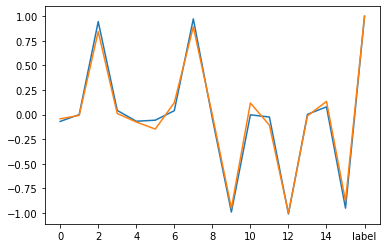

In [16]:
smallNormal.loc[smallNormal['label'] == 1, :].mean().plot()
smallTestNoise_010_09.loc[smallTestNoise_010_09['label'] == 1, :].mean().plot()